# Import software libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and preview the data

In [2]:
df = pd.read_pickle('users_data_final.pickle')
df

,user_id,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,1,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,0,1,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,0,0,1,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,0,0,0,1,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,a218c1d6-880a-4431-a314-a1bd3dc36b21,2.0,825.00,0,1,0,0,0,0,0,...,977,3,-1,0,True,1,0,0,3,12
45212,6a6bf402-9416-4e71-97c6-727e8298a3a5,4.0,1729.00,0,0,0,0,1,0,0,...,456,2,-1,0,True,1,0,0,5,11
45213,be32ba96-b178-4b54-b32a-f75b714793df,2.0,5715.00,0,0,0,0,1,0,0,...,1127,5,184,3,True,0,0,0,5,6
45214,44623a48-4e9b-48fd-b155-a17d1c06a754,0.0,1369.42,0,0,0,1,0,0,0,...,508,4,-1,0,False,1,0,0,4,9


# Check the shape of the data

In [3]:
df.shape

(45179, 33)

# Check the data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45179 non-null  object 
 1   number_transactions  45179 non-null  float64
 2   total_amount_usd     45179 non-null  float64
 3   job_management       45179 non-null  int64  
 4   job_technician       45179 non-null  int64  
 5   job_entrepreneur     45179 non-null  int64  
 6   job_blue-collar      45179 non-null  int64  
 7   job_retired          45179 non-null  int64  
 8   job_admin.           45179 non-null  int64  
 9   job_services         45179 non-null  int64  
 10  job_self-employed    45179 non-null  int64  
 11  job_unemployed       45179 non-null  int64  
 12  job_housemaid        45179 non-null  int64  
 13  job_student          45179 non-null  int64  
 14  education_tertiary   45179 non-null  int64  
 15  education_secondary  45179 non-null 

# Explore the distribution of the target variable

- You need to plot the distribution of the target column (term_deposit) and explain what is the problem of the distribution.

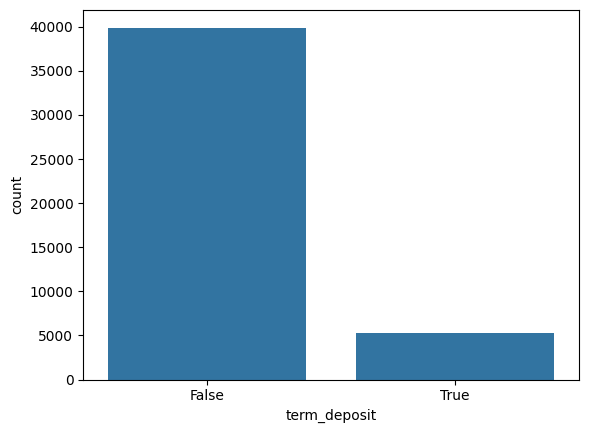

In [5]:
sns.countplot(x='term_deposit', data=df)
plt.show()

- there is imbalance problem in data distribution.

# Apply oversampling or SMOTE to the target label

In [6]:
df = df.drop(['user_id'], axis=1)
df

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,3.0,2143.00,1,0,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,0.0,1369.42,0,1,0,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,2.0,2.00,0,0,1,0,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,0.0,1369.42,0,0,0,1,0,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,1.0,1.00,0,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,2.0,825.00,0,1,0,0,0,0,0,0,...,977,3,-1,0,True,1,0,0,3,12
45212,4.0,1729.00,0,0,0,0,1,0,0,0,...,456,2,-1,0,True,1,0,0,5,11
45213,2.0,5715.00,0,0,0,0,1,0,0,0,...,1127,5,184,3,True,0,0,0,5,6
45214,0.0,1369.42,0,0,0,1,0,0,0,0,...,508,4,-1,0,False,1,0,0,4,9


In [7]:
y = df['term_deposit']
x = df.drop(['term_deposit'], axis=1)
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)
data_resampled = pd.DataFrame(x_res, x)
data_resampled['term_deposit'] = y_res

In [8]:
df2 = pd.DataFrame(y_res)

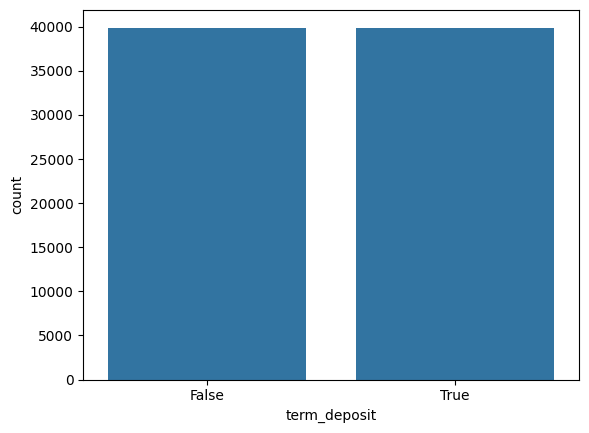

In [9]:
sns.countplot(x='term_deposit', data=df2)
plt.show()

# Normalize the data

In [10]:
scaler = MinMaxScaler().fit(df)
scaled_data = scaler.transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [11]:
scaled_df

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,0.15,0.092259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.666667,0.636364
1,0.00,0.085236,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.333333,0.545455
2,0.10,0.072822,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.015453,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.166667,0.454545
3,0.00,0.085236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.018707,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.500000,0.454545
4,0.05,0.072812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040260,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.166667,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45174,0.10,0.080293,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.198658,0.032258,0.000000,0.000000,1.0,1.0,0.0,0.0,0.500000,1.000000
45175,0.20,0.088501,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.092721,0.016129,0.000000,0.000000,1.0,1.0,0.0,0.0,0.833333,0.909091
45176,0.10,0.124689,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.229158,0.064516,0.212156,0.010909,1.0,0.0,0.0,0.0,0.833333,0.454545
45177,0.00,0.085236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.103294,0.048387,0.000000,0.000000,0.0,1.0,0.0,0.0,0.666667,0.727273


# Standardlize the data

In [13]:
scaler = StandardScaler()
scaler.fit(df)
standardized_data = scaler.transform(df)
standardized_df = pd.DataFrame(standardized_data, columns=df.columns)
standardized_df

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,-0.026089,0.285937,1.94405,-0.449427,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,0.011244,-0.569209,-0.411483,-0.251868,-0.363973,-0.605011,-0.372153,-0.628092,1.674044,0.437578
1,-0.826099,-0.000123,-0.51439,2.225055,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.416309,-0.569209,-0.411483,-0.251868,-0.363973,1.652861,-0.372153,1.592123,-0.132969,0.145892
2,-0.292759,-0.505776,-0.51439,-0.449427,5.424350,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.707822,-0.569209,-0.411483,-0.251868,-0.363973,-0.605011,-0.372153,-0.628092,-1.036476,-0.145795
3,-0.826099,-0.000123,-0.51439,-0.449427,-0.184354,1.909360,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.645633,-0.569209,-0.411483,-0.251868,-0.363973,-0.605011,2.687069,-0.628092,0.770537,-0.145795
4,-0.559429,-0.506146,-0.51439,-0.449427,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.233627,-0.569209,-0.411483,-0.251868,-0.363973,-0.605011,-0.372153,1.592123,-1.036476,0.437578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45174,-0.292759,-0.201442,-0.51439,2.225055,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,2.794223,0.076410,-0.411483,-0.251868,2.747459,1.652861,-0.372153,-0.628092,0.770537,1.604325
45175,0.240581,0.132845,-0.51439,-0.449427,-0.184354,-0.523736,4.355804,-0.359395,-0.318122,-0.190179,...,0.769178,-0.246400,-0.411483,-0.251868,2.747459,1.652861,-0.372153,-0.628092,2.577550,1.312639
45176,-0.292759,1.606815,-0.51439,-0.449427,-0.184354,-0.523736,4.355804,-0.359395,-0.318122,-0.190179,...,3.377249,0.722029,1.436044,1.050790,2.747459,-0.605011,-0.372153,-0.628092,2.577550,-0.145795
45177,-0.826099,-0.000123,-0.51439,-0.449427,-0.184354,1.909360,-0.229579,-0.359395,-0.318122,-0.190179,...,0.971294,0.399219,-0.411483,-0.251868,-0.363973,1.652861,-0.372153,-0.628092,1.674044,0.729265


In [14]:
standardized_df.describe()

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
count,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04,...,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04,4.517900e+04
mean,-5.536002e-17,-2.516365e-17,-2.264728e-17,1.006546e-17,3.774547e-17,-3.522910e-17,4.026183e-17,-4.655275e-17,7.549094e-18,6.353821e-17,...,8.933094e-17,-2.013092e-17,-1.207855e-16,-4.026183e-17,-6.039275e-17,2.410205e-17,1.415455e-17,-5.032729e-18,-4.529456e-17,-5.913457e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,...,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-8.260993e-01,-3.471836e+00,-5.143901e-01,-4.494271e-01,-1.843539e-01,-5.237357e-01,-2.295787e-01,-3.593946e-01,-3.181221e-01,-1.901790e-01,...,-1.003222e+00,-5.692091e-01,-4.114831e-01,-2.518682e-01,-3.639726e-01,-6.050114e-01,-3.721526e-01,-6.280921e-01,-1.939982e+00,-1.604229e+00
25%,-2.927592e-01,-4.473500e-01,-5.143901e-01,-4.494271e-01,-1.843539e-01,-5.237357e-01,-2.295787e-01,-3.593946e-01,-3.181221e-01,-1.901790e-01,...,-6.028775e-01,-5.692091e-01,-4.114831e-01,-2.518682e-01,-3.639726e-01,-6.050114e-01,-3.721526e-01,-6.280921e-01,-1.036476e+00,-7.291684e-01
50%,-2.927592e-01,-1.877597e-01,-5.143901e-01,-4.494271e-01,-1.843539e-01,-5.237357e-01,-2.295787e-01,-3.593946e-01,-3.181221e-01,-1.901790e-01,...,-3.035906e-01,-2.463996e-01,-4.114831e-01,-2.518682e-01,-3.639726e-01,-6.050114e-01,-3.721526e-01,-6.280921e-01,-1.329692e-01,1.458918e-01
75%,-2.608915e-02,-1.225041e-04,-5.143901e-01,-4.494271e-01,-1.843539e-01,-5.237357e-01,-2.295787e-01,-3.593946e-01,-3.181221e-01,-1.901790e-01,...,2.366805e-01,7.640995e-02,-4.114831e-01,-2.518682e-01,-3.639726e-01,1.652861e+00,-3.721526e-01,1.592123e+00,7.705372e-01,7.292652e-01
max,4.507302e+00,3.725869e+01,1.944050e+00,2.225055e+00,5.424350e+00,1.909360e+00,4.355804e+00,2.782457e+00,3.143447e+00,5.258203e+00,...,1.811227e+01,1.944498e+01,8.296860e+00,1.191585e+02,2.747459e+00,1.652861e+00,2.687069e+00,1.592123e+00,3.481056e+00,1.604325e+00


# Plot the PCA

In [16]:
pca = PCA(n_components=2)
pca.fit(df)
principal_components = pca.transform(df)

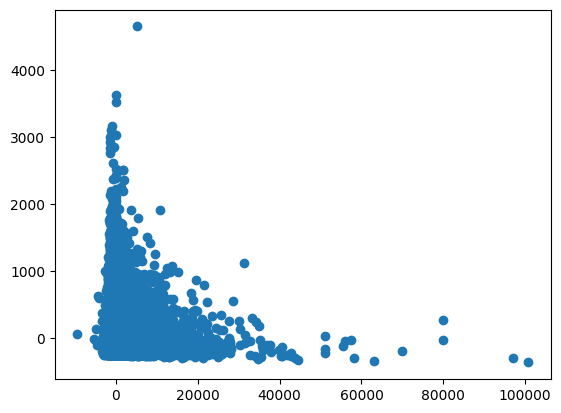

In [17]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.show()